# Linear regression using Gaussian output

In [10]:
from pprint import pprint
import matplotlib.pyplot as plt
import jax.numpy as jnp
import jax
import seaborn as sns

try:
    import tensorflow as tf
except ModuleNotFoundError:
    %pip install -qq tensorflow
    import tensorflow as tf

try:
    from probml_utils import savefig, latexify
except ModuleNotFoundError:
    %pip install git+https://github.com/probml/probml-utils.git
    from probml_utils import savefig, latexify

try:
    import tensorflow_probability as tfp
except ModuleNotFoundError:
    %pip install -qq tensorflow-probability
    import tensorflow_probability as tfp

from tensorflow import keras

In [11]:
tfd = tfp.distributions

## Generate Dataset

In [45]:
w0 = 0.125
b0 = 5.0
x_range = [-20, 60]


def load_dataset(n=150, n_tst=150):
    key = jax.random.PRNGKey(43)
    key, subkey = jax.random.split(key)

    def s(x):
        g = (x - x_range[0]) / (x_range[1] - x_range[0])
        return 3 * (0.25 + g**2.0)

    x = (x_range[1] - x_range[0]) * jax.random.uniform(key, shape=(150,)) + x_range[0]
    eps = jax.random.normal(subkey, shape=(150,)) * s(x)
    y = (w0 * x * (1.0 + jnp.sin(x)) + b0) + eps
    x = x[..., jnp.newaxis]
    y = y[..., jnp.newaxis]
    x_tst = jnp.linspace(*x_range, num=n_tst).astype(jnp.float32)
    x_tst = x_tst[..., jnp.newaxis]
    return y, x, x_tst


y, x, x_tst = load_dataset()

<Figure size 432x288 with 0 Axes>

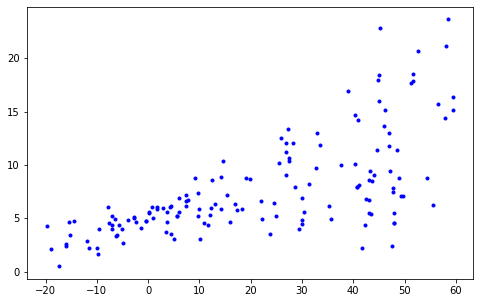

In [46]:
plt.figure()
plt.figure(figsize=[8, 5])  # inches
plt.plot(x, y, "b.", label="observed")
# savefig("linreg_1d_hetero_data.pdf")
plt.show()

In [47]:
def nll(x_train, dist):
    """Calculates the negative log-likelihood for a given distribution
    and a data set."""
    return -tf.reduce_mean(dist.log_prob(x_train))

## With Fixed variance $\sigma^2$ (homoskedastic)

In [48]:
optimizer = tf.optimizers.Adam(learning_rate=0.01)
loss = nll

model = keras.Sequential(
    [
        keras.layers.Dense(1),  # 1 linear layer
        tfp.layers.DistributionLambda(lambda t: tfd.Normal(loc=t, scale=1)),
    ]
)
model.compile(optimizer=optimizer, loss=loss)

In [52]:
history = model.fit(x, y, epochs=1000, verbose=False)
# [print(np.squeeze(w.numypy())) for w in model.weights]
# yhat = model(x_tst)
# assert isinstance(yhat, tfd.Distribution)

2022-06-20 15:48:19.532104: W tensorflow/core/framework/op_kernel.cc:1733] INVALID_ARGUMENT: TypeError: Using a non-tuple sequence for multidimensional indexing is not allowed; use `arr[array(seq)]` instead of `arr[seq]`. See https://github.com/google/jax/issues/4564 for more information.
Traceback (most recent call last):

  File "/home/tensorboy/dev/env/lib/python3.8/site-packages/tensorflow/python/ops/script_ops.py", line 268, in __call__
    return func(device, token, args)

  File "/home/tensorboy/dev/env/lib/python3.8/site-packages/tensorflow/python/ops/script_ops.py", line 146, in __call__
    outputs = self._call(device, args)

  File "/home/tensorboy/dev/env/lib/python3.8/site-packages/tensorflow/python/ops/script_ops.py", line 153, in _call
    ret = self._func(*args)

  File "/home/tensorboy/dev/env/lib/python3.8/site-packages/tensorflow/python/autograph/impl/api.py", line 642, in wrapper
    return func(*args, **kwargs)

  File "/home/tensorboy/dev/env/lib/python3.8/site-pa

InvalidArgumentError: Graph execution error:

TypeError: Using a non-tuple sequence for multidimensional indexing is not allowed; use `arr[array(seq)]` instead of `arr[seq]`. See https://github.com/google/jax/issues/4564 for more information.
Traceback (most recent call last):

  File "/home/tensorboy/dev/env/lib/python3.8/site-packages/tensorflow/python/ops/script_ops.py", line 268, in __call__
    return func(device, token, args)

  File "/home/tensorboy/dev/env/lib/python3.8/site-packages/tensorflow/python/ops/script_ops.py", line 146, in __call__
    outputs = self._call(device, args)

  File "/home/tensorboy/dev/env/lib/python3.8/site-packages/tensorflow/python/ops/script_ops.py", line 153, in _call
    ret = self._func(*args)

  File "/home/tensorboy/dev/env/lib/python3.8/site-packages/tensorflow/python/autograph/impl/api.py", line 642, in wrapper
    return func(*args, **kwargs)

  File "/home/tensorboy/dev/env/lib/python3.8/site-packages/keras/engine/data_adapter.py", line 477, in py_method
    return [slice_array(inp) for inp in flat_inputs]

  File "/home/tensorboy/dev/env/lib/python3.8/site-packages/keras/engine/data_adapter.py", line 477, in <listcomp>
    return [slice_array(inp) for inp in flat_inputs]

  File "/home/tensorboy/dev/env/lib/python3.8/site-packages/keras/engine/data_adapter.py", line 475, in slice_array
    return training_utils.slice_arrays(data, ind.numpy(),

  File "/home/tensorboy/dev/env/lib/python3.8/site-packages/keras/engine/training_utils.py", line 52, in slice_arrays
    slices = generic_utils.slice_arrays(arrays, indices)

  File "/home/tensorboy/dev/env/lib/python3.8/site-packages/keras/utils/generic_utils.py", line 1109, in slice_arrays
    return [None if x is None else x[start] for x in arrays]

  File "/home/tensorboy/dev/env/lib/python3.8/site-packages/keras/utils/generic_utils.py", line 1109, in <listcomp>
    return [None if x is None else x[start] for x in arrays]

  File "/home/tensorboy/dev/env/lib/python3.8/site-packages/jax/_src/numpy/lax_numpy.py", line 3540, in _rewriting_take
    treedef, static_idx, dynamic_idx = _split_index_for_jit(idx, arr.shape)

  File "/home/tensorboy/dev/env/lib/python3.8/site-packages/jax/_src/numpy/lax_numpy.py", line 3615, in _split_index_for_jit
    idx = _eliminate_deprecated_list_indexing(idx)

  File "/home/tensorboy/dev/env/lib/python3.8/site-packages/jax/_src/numpy/lax_numpy.py", line 3895, in _eliminate_deprecated_list_indexing
    raise TypeError(msg)

TypeError: Using a non-tuple sequence for multidimensional indexing is not allowed; use `arr[array(seq)]` instead of `arr[seq]`. See https://github.com/google/jax/issues/4564 for more information.


	 [[{{node EagerPyFunc}}]]
	 [[IteratorGetNext]] [Op:__inference_train_function_2644]

### Loss vs. Epoch graph

In [ ]:
plt.plot(history.history["loss"], label="Train")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("NLL Loss")
plt.show()

In [ ]:
plt.figure()
plt.plot(x, y, "b.", label="observed")
plt.plot(x_tst, yhat.mean(), "r", label="mean", linewidth=4)
savefig("linreg_1d_hetero_mean.pdf")
plt.show()

### 

In [ ]:
plt.figure()
plt.plot(x, y, "b.", label="observed")
m = yhat.mean()
s = yhat.stddev()
plt.plot(x_tst, m, "r", linewidth=4, label="mean")
plt.plot(x_tst, m + 2 * s, "g", linewidth=2, label=r"mean + 2 stddev")
plt.plot(x_tst, m - 2 * s, "g", linewidth=2, label=r"mean - 2 stddev")
savefig("linreg_1d_hetero_var_fixed.pdf")
plt.show()

## Data-dependent variance (heteroskedastic)
mu(x) = b + wx


sigma(x) = softplus( 0.05 * b' + w' x)

In [ ]:
optimizer = tf.optimizers.Adam(learning_rate=0.01)
loss = nll

model = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(1 + 1),  # linear model for mean and variance
        tfp.layers.DistributionLambda(
            lambda t: tfd.Normal(loc=t[..., :1], scale=1e-3 + tf.math.softplus(0.05 * t[..., 1:]))
        ),
    ]
)

model.compile(optimizer=optimizer, loss=loss)

In [ ]:
model.fit(x, y, epochs=1000, verbose=False)
yhat = model(x_tst)
assert isinstance(yhat, tfd.Distribution)

In [ ]:
plt.figure()
plt.plot(x, y, "b.", label="observed")
m = yhat.mean()
s = yhat.stddev()

plt.plot(x_tst, m, "r", linewidth=4, label="mean")
plt.plot(x_tst, m + 2 * s, "g", linewidth=2, label=r"mean + 2 stddev")
plt.plot(x_tst, m - 2 * s, "g", linewidth=2, label=r"mean - 2 stddev")
# savefig("linreg_1d_hetero_var_adaptive.pdf")
plt.show()

In [ ]:
# model = keras.Sequential(
#     [
#         keras.layers.Dense(1 + 1),  # linear model for mean and variance
#         tfp.layers.DistributionLambda(
#             lambda t: tfd.Normal(loc=t[..., :1], scale=1e-3 + tf.math.softplus(0.05 * t[..., 1:]))
#         ),
#     ]
# )

# model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.01), loss=negloglik)
# model.fit(x, y, epochs=1000, verbose=False)
# yhat = model(x_tst)
# assert isinstance(yhat, tfd.Distribution)


# plt.figure()
# plt.plot(x, y, "b.", label="observed")
# m = yhat.mean()
# s = yhat.stddev()

# plt.plot(x_tst, m, "r", linewidth=4, label="mean")
# plt.plot(x_tst, m + 2 * s, "g", linewidth=2, label=r"mean + 2 stddev")
# plt.plot(x_tst, m - 2 * s, "g", linewidth=2, label=r"mean - 2 stddev")
# # savefig("linreg_1d_hetero_var_adaptive.pdf")
# plt.show()

In [ ]:
# # Linear regression using MLE with fixed variance and input-dependent variance.
# # Adapted from
# # https://colab.sandbox.google.com/github/tensorflow/probability/blob/master/tensorflow_probability/examples/jupyter_notebooks/Probabilistic_Layers_Regression.ipynb#scrollTo=5zCEYpzu7bDX


# from __future__ import absolute_import
# from __future__ import division
# from __future__ import print_function

# from pprint import pprint
# import matplotlib.pyplot as plt
# import numpy as np
# import seaborn as sns

# try:
#     import tensorflow.compat.v2 as tf
# except ModuleNotFoundError:
#     %pip install -qq tensorflow
#     import tensorflow.compat.v2 as tf
# tf.enable_v2_behavior()

# try:
#     import tensorflow_probability as tfp
# except ModuleNotFoundError:
#     %pip install -qq tensorflow-probability
#     import tensorflow_probability as tfp
# import numpy as np
# import matplotlib.pyplot as plt
# import os

# figdir = "figures"


# def savefig(fname):
#     plt.savefig(os.path.join(figdir, fname))


# sns.reset_defaults()
# # sns.set_style('whitegrid')
# # sns.set_context('talk')
# sns.set_context(context="talk", font_scale=0.7)

# tfd = tfp.distributions


# # # @title Synthesize dataset.
# # w0 = 0.125
# # b0 = 5.0
# # x_range = [-20, 60]


# # def load_dataset(n=150, n_tst=150):
# #     np.random.seed(43)

# #     def s(x):
# #         g = (x - x_range[0]) / (x_range[1] - x_range[0])
# #         return 3 * (0.25 + g**2.0)

# #     x = (x_range[1] - x_range[0]) * np.random.rand(n) + x_range[0]
# #     eps = np.random.randn(n) * s(x)
# #     y = (w0 * x * (1.0 + np.sin(x)) + b0) + eps
# #     x = x[..., np.newaxis]
# #     x_tst = np.linspace(*x_range, num=n_tst).astype(np.float32)
# #     x_tst = x_tst[..., np.newaxis]
# #     return y, x, x_tst


# # y, x, x_tst = load_dataset()


# # plt.figure()
# # # plt.figure(figsize=[8, 5])  # inches
# # plt.plot(x, y, "b.", label="observed")
# # savefig("linreg_1d_hetero_data.pdf")
# # plt.show()


# ### Fixed output variance
# model = tf.keras.Sequential(
#     [
#         tf.keras.layers.Dense(1),  # 1 linear layer
#         tfp.layers.DistributionLambda(lambda t: tfd.Normal(loc=t, scale=1)),
#     ]
# )

# # negloglik = lambda y, rv_y: -rv_y.log_prob(y)
# # model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.01), loss=negloglik)
# # history = model.fit(x, y, epochs=1000, verbose=False)
# # [print(np.squeeze(w.numpy())) for w in model.weights]
# # yhat = model(x_tst)
# # assert isinstance(yhat, tfd.Distribution)

# plt.plot(history.history["loss"], label="Train")
# # plt.plot(history.history['val_loss'], label='Val')
# plt.legend()
# plt.xlabel("Epoch")
# plt.ylabel("NLL")
# plt.show()


# plt.figure()
# plt.plot(x, y, "b.", label="observed")
# plt.plot(x_tst, yhat.mean(), "r", label="mean", linewidth=4)
# savefig("linreg_1d_hetero_mean.pdf")
# plt.show()


# plt.figure()
# plt.plot(x, y, "b.", label="observed")
# m = yhat.mean()
# s = yhat.stddev()
# plt.plot(x_tst, m, "r", linewidth=4, label="mean")
# plt.plot(x_tst, m + 2 * s, "g", linewidth=2, label=r"mean + 2 stddev")
# plt.plot(x_tst, m - 2 * s, "g", linewidth=2, label=r"mean - 2 stddev")
# savefig("linreg_1d_hetero_var_fixed.pdf")
# plt.show()

# # Data-dependent variance (heteroskedastic)

# # mu(x) = b + wx
# # sigma(x) = softplus( 0.05 * b' + w' x)
# model = tf.keras.Sequential(
#     [
#         tf.keras.layers.Dense(1 + 1),  # linear model for mean and variance
#         tfp.layers.DistributionLambda(
#             lambda t: tfd.Normal(loc=t[..., :1], scale=1e-3 + tf.math.softplus(0.05 * t[..., 1:]))
#         ),
#     ]
# )

# model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.01), loss=negloglik)
# model.fit(x, y, epochs=1000, verbose=False)
# yhat = model(x_tst)
# assert isinstance(yhat, tfd.Distribution)


# plt.figure()
# plt.plot(x, y, "b.", label="observed")
# m = yhat.mean()
# s = yhat.stddev()

# plt.plot(x_tst, m, "r", linewidth=4, label="mean")
# plt.plot(x_tst, m + 2 * s, "g", linewidth=2, label=r"mean + 2 stddev")
# plt.plot(x_tst, m - 2 * s, "g", linewidth=2, label=r"mean - 2 stddev")
# savefig("linreg_1d_hetero_var_adaptive.pdf")
# plt.show()